In [1]:
# generic data science libraries
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn import ensemble

# models
from sklearn.linear_model import LogisticRegression #Although it's called "regression" this is actually a classifer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve, brier_score_loss, mean_squared_error

# usability in Jupyter
pd.set_option('display.max_columns', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\gwoo3513\AppData\Local\Temp\ipykernel_85988\2235743679.py:30: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Gather the Data

In [2]:
#Men's Data
MNCAATourneyDetailedResults_df = pd.read_csv("MNCAATourneyDetailedResults.csv")
MRegularSeasonDetailedResults_df = pd.read_csv("MRegularSeasonDetailedResults.csv")

#Women's Data
WNCAATourneyDetailedResults_df = pd.read_csv("WNCAATourneyDetailedResults.csv")
WRegularSeasonDetailedResults_df = pd.read_csv("WRegularSeasonDetailedResults.csv")

# Join the Data

In [3]:
#Use MRegularSeasonDetailedResults_df as main DF
#append the tourney data to the regular season data since their columns lineup

#MENS
m_df = MRegularSeasonDetailedResults_df.append(MNCAATourneyDetailedResults_df)

#WOMENS
w_df = WRegularSeasonDetailedResults_df.append(WNCAATourneyDetailedResults_df)

C:\Users\gwoo3513\AppData\Local\Temp\ipykernel_85988\2524677773.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m_df = MRegularSeasonDetailedResults_df.append(MNCAATourneyDetailedResults_df)
C:\Users\gwoo3513\AppData\Local\Temp\ipykernel_85988\2524677773.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_df = WRegularSeasonDetailedResults_df.append(WNCAATourneyDetailedResults_df)


In [4]:
#MENS
m_win_df = m_df[['Season','DayNum','WTeamID','WScore','NumOT','WFGM','WFGA','WFGM3','WFGA3','WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF']]
#add win/loss column
m_win_df['Result'] = 'Win'

m_lose_df = m_df[['Season','DayNum','LTeamID','LScore','NumOT','LFGM','LFGA','LFGM3','LFGA3','LFTM','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']]
#add win/loss column
m_lose_df['Result'] = 'Lose'


#WOMENS
w_win_df = w_df[['Season','DayNum','WTeamID','WScore','NumOT','WFGM','WFGA','WFGM3','WFGA3','WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF']]
#add win/loss column
w_win_df['Result'] = 'Win'

w_lose_df = w_df[['Season','DayNum','LTeamID','LScore','NumOT','LFGM','LFGA','LFGM3','LFGA3','LFTM','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']]
#add win/loss column
w_lose_df['Result'] = 'Lose'

C:\Users\gwoo3513\AppData\Local\Temp\ipykernel_85988\3772120924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_win_df['Result'] = 'Win'
C:\Users\gwoo3513\AppData\Local\Temp\ipykernel_85988\3772120924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_lose_df['Result'] = 'Lose'
C:\Users\gwoo3513\AppData\Local\Temp\ipykernel_85988\3772120924.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [5]:
#rename columns

#MENS
m_win_df = m_win_df.rename(columns = {'WTeamID': 'TeamID', 'WScore': 'Score', 'WFGM': 'FGM', 'WFGA': 'FGA', 'WFGM3': 'FGM3', 'WFGA3': 'FGA3', 'WFTM': 'FTM', 'WFTA': 'FTA', 
                                  'WOR': 'OR', 'WDR': 'DR', 'WAst': 'Ast', 'WTO': 'TO', 'WStl': 'Stl', 'WBlk': 'Blk', 'WPF': 'PF'}, inplace = False)
m_lose_df = m_lose_df.rename(columns = {'LTeamID': 'TeamID', 'LScore': 'Score', 'LFGM': 'FGM', 'LFGA': 'FGA', 'LFGM3': 'FGM3', 'LFGA3': 'FGA3', 'LFTM': 'FTM', 'LFTA': 'FTA', 
                                  'LOR': 'OR', 'LDR': 'DR', 'LAst': 'Ast', 'LTO': 'TO', 'LStl': 'Stl', 'LBlk': 'Blk', 'LPF': 'PF'}, inplace = False)

#WOMENS
w_win_df = w_win_df.rename(columns = {'WTeamID': 'TeamID', 'WScore': 'Score', 'WFGM': 'FGM', 'WFGA': 'FGA', 'WFGM3': 'FGM3', 'WFGA3': 'FGA3', 'WFTM': 'FTM', 'WFTA': 'FTA', 
                                  'WOR': 'OR', 'WDR': 'DR', 'WAst': 'Ast', 'WTO': 'TO', 'WStl': 'Stl', 'WBlk': 'Blk', 'WPF': 'PF'}, inplace = False)
w_lose_df = w_lose_df.rename(columns = {'LTeamID': 'TeamID', 'LScore': 'Score', 'LFGM': 'FGM', 'LFGA': 'FGA', 'LFGM3': 'FGM3', 'LFGA3': 'FGA3', 'LFTM': 'FTM', 'LFTA': 'FTA', 
                                  'LOR': 'OR', 'LDR': 'DR', 'LAst': 'Ast', 'LTO': 'TO', 'LStl': 'Stl', 'LBlk': 'Blk', 'LPF': 'PF'}, inplace = False)

In [6]:
#append the losing data to the winning data since their columns lineup

#MENS
m_new_df = m_win_df.append(m_lose_df)

#WOMENS
w_new_df = w_win_df.append(w_lose_df)

C:\Users\gwoo3513\AppData\Local\Temp\ipykernel_85988\1378837373.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m_new_df = m_win_df.append(m_lose_df)
C:\Users\gwoo3513\AppData\Local\Temp\ipykernel_85988\1378837373.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w_new_df = w_win_df.append(w_lose_df)


In [7]:
#Drop Columns I don't care for

#MENS
m_new_df = m_new_df.drop(['DayNum','NumOT'], axis=1)

#WOMENS
w_new_df = w_new_df.drop(['DayNum','NumOT'], axis=1)

In [8]:
#Append the womens to the mens to make one dataset
df=m_new_df.append(w_new_df)
df

C:\Users\gwoo3513\AppData\Local\Temp\ipykernel_85988\73870693.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=m_new_df.append(w_new_df)


,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result
0,2003,1104,68,27,58,3,14,11,18,14,24,13,23,7,1,22,Win
1,2003,1272,70,26,62,8,20,10,19,15,28,16,13,4,4,18,Win
2,2003,1266,73,24,58,8,18,17,29,17,26,15,10,5,2,25,Win
3,2003,1296,56,18,38,3,9,17,31,6,19,11,12,14,2,18,Win
4,2003,1400,77,30,61,6,14,11,13,17,22,12,14,4,4,20,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2022,3301,87,32,66,7,23,16,19,6,30,20,13,4,7,16,Lose
756,2022,3276,50,16,46,3,14,15,20,10,24,9,21,6,2,12,Lose
757,2022,3390,58,23,66,4,23,8,13,11,23,10,11,11,3,16,Lose
758,2022,3257,59,27,63,1,8,4,7,11,18,5,15,13,2,17,Lose


In [9]:
#Condense the data into percentages such as FG percent or FG3 percent, etc.

#add columns
df['FG_Percent'] = df['FGM']/df['FGA']
df['FG3_Percent'] = df['FGM3']/df['FGA3']
df['FT_Percent'] = df['FTM']/df['FTA']

In [10]:
#fill null values with averages
df['FT_Percent'] = df['FT_Percent'].fillna(df['FT_Percent'].mean())
df['FG3_Percent'] = df['FG3_Percent'].fillna(df['FG3_Percent'].mean())
df['FG_Percent'] = df['FG_Percent'].fillna(df['FG_Percent'].mean())

In [11]:
#Change Result to integer

df_dum = pd.get_dummies(df[["Result"]], drop_first=True)
df_dum.columns = ["Result"]
#put back into original dataset (sometimes you have to do a join here)
df["Result"] = df_dum["Result"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357698 entries, 0 to 759
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Season       357698 non-null  int64  
 1   TeamID       357698 non-null  int64  
 2   Score        357698 non-null  int64  
 3   FGM          357698 non-null  int64  
 4   FGA          357698 non-null  int64  
 5   FGM3         357698 non-null  int64  
 6   FGA3         357698 non-null  int64  
 7   FTM          357698 non-null  int64  
 8   FTA          357698 non-null  int64  
 9   OR           357698 non-null  int64  
 10  DR           357698 non-null  int64  
 11  Ast          357698 non-null  int64  
 12  TO           357698 non-null  int64  
 13  Stl          357698 non-null  int64  
 14  Blk          357698 non-null  int64  
 15  PF           357698 non-null  int64  
 16  Result       357698 non-null  uint8  
 17  FG_Percent   357698 non-null  float64
 18  FG3_Percent  357698 non-nul

In [13]:
#Now let's limit our data to only the 2023 season
df = df.loc[df.Season == 2023]
df

,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result,FG_Percent,FG3_Percent,FT_Percent
102032,2023,1101,65,23,57,8,28,11,20,4,28,12,15,9,5,17,1,0.403509,0.285714,0.550000
102033,2023,1103,81,30,69,11,31,10,12,8,23,16,9,5,5,17,1,0.434783,0.354839,0.833333
102034,2023,1104,75,27,69,3,28,18,26,19,43,10,19,6,9,18,1,0.391304,0.107143,0.692308
102035,2023,1112,117,38,53,11,18,30,40,7,36,30,24,7,5,22,1,0.716981,0.611111,0.750000
102036,2023,1113,62,21,62,6,24,14,29,14,31,10,21,8,11,27,1,0.338710,0.250000,0.482759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,2023,3234,68,23,66,11,38,11,15,18,19,14,24,5,3,14,0,0.348485,0.289474,0.733333
70003,2023,3163,64,22,62,8,21,12,15,11,25,14,12,5,7,19,0,0.354839,0.380952,0.800000
70004,2023,3396,53,16,70,7,26,14,17,16,19,5,9,10,9,20,0,0.228571,0.269231,0.823529
70005,2023,3177,64,26,77,4,19,8,11,21,26,13,12,9,2,14,0,0.337662,0.210526,0.727273


In [14]:
#Drop Columns I don't want
df = df.drop(['FGM','FGA','FGM3','FGA3','FTM','FTA'], axis=1)

# Correlations

In [15]:
#Correlations
df.corr()

,Season,TeamID,Score,OR,DR,Ast,TO,Stl,Blk,PF,Result,FG_Percent,FG3_Percent,FT_Percent
Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TeamID,NaN,1.000000,-0.215020,0.144077,-0.005868,-0.000838,0.345549,0.189989,-0.028435,-0.004503,0.001144,-0.233506,-0.132042,-0.015200
Score,NaN,-0.215020,1.000000,0.117556,0.298648,0.628749,-0.253434,0.123803,0.138709,0.071751,0.513810,0.748858,0.496883,0.191379
OR,NaN,0.144077,0.117556,1.000000,0.098009,0.062837,0.074019,0.163751,0.103956,0.055890,0.085189,-0.239999,-0.185209,-0.098954
DR,NaN,-0.005868,0.298648,0.098009,1.000000,0.250681,0.067323,-0.128412,0.257003,-0.064194,0.393745,0.185896,0.073749,0.024955
Ast,NaN,-0.000838,0.628749,0.062837,0.250681,1.000000,-0.098464,0.126424,0.147312,-0.086132,0.406353,0.555481,0.424992,0.027602
TO,NaN,0.345549,-0.253434,0.074019,0.067323,-0.098464,1.000000,0.137116,0.012791,0.208772,-0.170720,-0.119588,-0.080540,-0.065237
Stl,NaN,0.189989,0.123803,0.163751,-0.128412,0.126424,0.137116,1.000000,0.047487,0.049936,0.178597,-0.004826,-0.053599,-0.035171
Blk,NaN,-0.028435,0.138709,0.103956,0.257003,0.147312,0.012791,0.047487,1.000000,-0.035922,0.191279,0.092814,0.022005,-0.008240
PF,NaN,-0.004503,0.071751,0.055890,-0.064194,-0.086132,0.208772,0.049936,-0.035922,1.000000,-0.213942,-0.065479,-0.046568,-0.036370


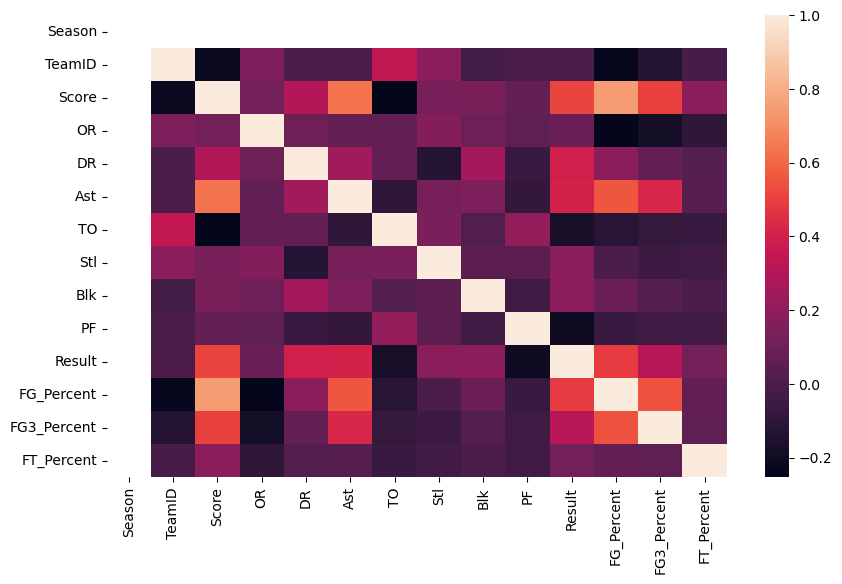

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())
plt.show()

In [17]:
df.head()

,Season,TeamID,Score,OR,DR,Ast,TO,Stl,Blk,PF,Result,FG_Percent,FG3_Percent,FT_Percent
102032,2023,1101,65,4,28,12,15,9,5,17,1,0.403509,0.285714,0.550000
102033,2023,1103,81,8,23,16,9,5,5,17,1,0.434783,0.354839,0.833333
102034,2023,1104,75,19,43,10,19,6,9,18,1,0.391304,0.107143,0.692308
102035,2023,1112,117,7,36,30,24,7,5,22,1,0.716981,0.611111,0.750000
102036,2023,1113,62,14,31,10,21,8,11,27,1,0.338710,0.250000,0.482759


# MODEL BUILDING

In [18]:
#Min Max Scaling
df[["Score","OR","DR","Ast","TO","Stl","Blk","PF"]] = minmax_scale(df[["Score","OR","DR","Ast","TO","Stl","Blk","PF"]])

In [19]:
df

,Season,TeamID,Score,OR,DR,Ast,TO,Stl,Blk,PF,Result,FG_Percent,FG3_Percent,FT_Percent
102032,2023,1101,0.411765,0.121212,0.574468,0.352941,0.333333,0.36,0.3125,0.394737,1,0.403509,0.285714,0.550000
102033,2023,1103,0.568627,0.242424,0.468085,0.470588,0.179487,0.20,0.3125,0.394737,1,0.434783,0.354839,0.833333
102034,2023,1104,0.509804,0.575758,0.893617,0.294118,0.435897,0.24,0.5625,0.421053,1,0.391304,0.107143,0.692308
102035,2023,1112,0.921569,0.212121,0.744681,0.882353,0.564103,0.28,0.3125,0.526316,1,0.716981,0.611111,0.750000
102036,2023,1113,0.382353,0.424242,0.638298,0.294118,0.487179,0.32,0.6875,0.657895,1,0.338710,0.250000,0.482759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,2023,3234,0.441176,0.545455,0.382979,0.411765,0.564103,0.20,0.1875,0.315789,0,0.348485,0.289474,0.733333
70003,2023,3163,0.401961,0.333333,0.510638,0.411765,0.256410,0.20,0.4375,0.447368,0,0.354839,0.380952,0.800000
70004,2023,3396,0.294118,0.484848,0.382979,0.147059,0.179487,0.40,0.5625,0.473684,0,0.228571,0.269231,0.823529
70005,2023,3177,0.401961,0.636364,0.531915,0.382353,0.256410,0.36,0.1250,0.315789,0,0.337662,0.210526,0.727273


In [20]:
#Get Pandas Columns for prediction
target = df["Result"]
features = df.drop(["Result"], axis=1) # Because we don't want to compare Result to itself

#Convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# LOGISTIC REGRESSION

Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      7499
           1       0.79      0.79      0.79      7541

    accuracy                           0.79     15040
   macro avg       0.79      0.79      0.79     15040
weighted avg       0.79      0.79      0.79     15040


Confusion Matrix - In Sample
[[5950 1549]
 [1611 5930]]

--------------------------------------------------------------------

Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1901
           1       0.79      0.81      0.80      1859

    accuracy                           0.80      3760
   macro avg       0.80      0.80      0.80      3760
weighted avg       0.80      0.80      0.80      3760


Confusion Matrix - Out Sample
[[1496  405]
 [ 355 1504]]


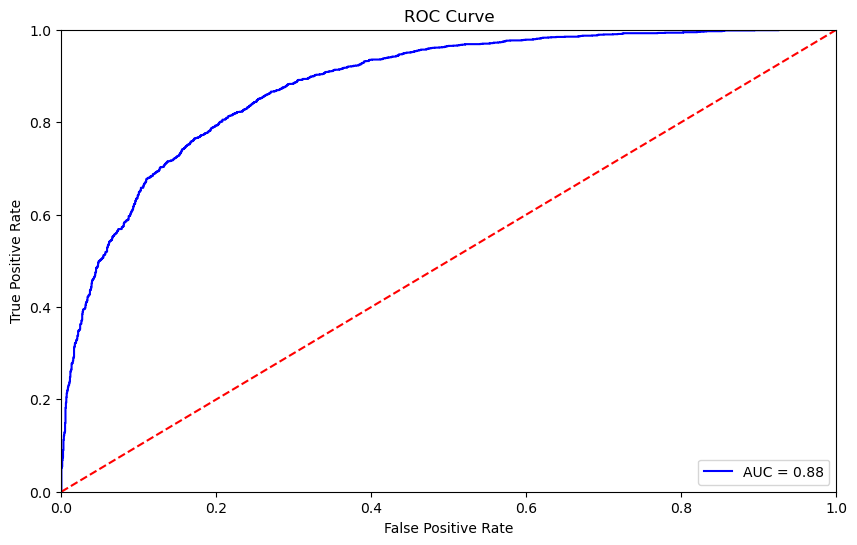

In [21]:
#train our model
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print('--------------------------------------------------------------------')
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# DECISION TREE

Decision Tree Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7499
           1       1.00      1.00      1.00      7541

    accuracy                           1.00     15040
   macro avg       1.00      1.00      1.00     15040
weighted avg       1.00      1.00      1.00     15040


Confusion Matrix - In Sample
[[7499    0]
 [   0 7541]]

--------------------------------------------------------------------

Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1901
           1       0.72      0.72      0.72      1859

    accuracy                           0.72      3760
   macro avg       0.72      0.72      0.72      3760
weighted avg       0.72      0.72      0.72      3760


Confusion Matrix - Out Sample
[[1369  532]
 [ 512 1347]]


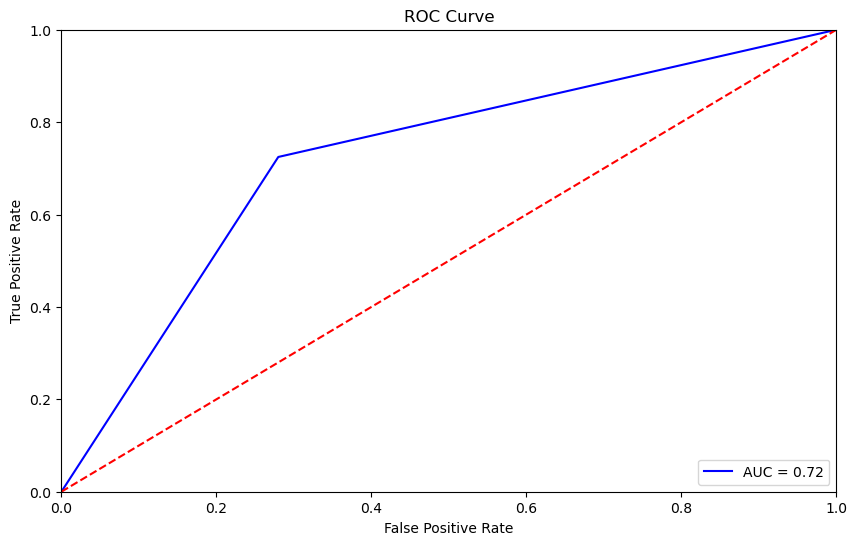

In [22]:
#train our model
dt = DecisionTreeClassifier(random_state=21)
dt.fit(X_train, y_train)

#get predictions
in_sample_preds = dt.predict(X_train)
out_sample_preds = dt.predict(X_test)

# get evaluation report
print("Decision Tree Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print('--------------------------------------------------------------------')
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = dt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RANDOM FOREST

Random Forest Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7499
           1       1.00      1.00      1.00      7541

    accuracy                           1.00     15040
   macro avg       1.00      1.00      1.00     15040
weighted avg       1.00      1.00      1.00     15040


Confusion Matrix - In Sample
[[7499    0]
 [   0 7541]]

--------------------------------------------------------------------

Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1901
           1       0.82      0.83      0.83      1859

    accuracy                           0.83      3760
   macro avg       0.83      0.83      0.83      3760
weighted avg       0.83      0.83      0.83      3760


Confusion Matrix - Out Sample
[[1570  331]
 [ 317 1542]]


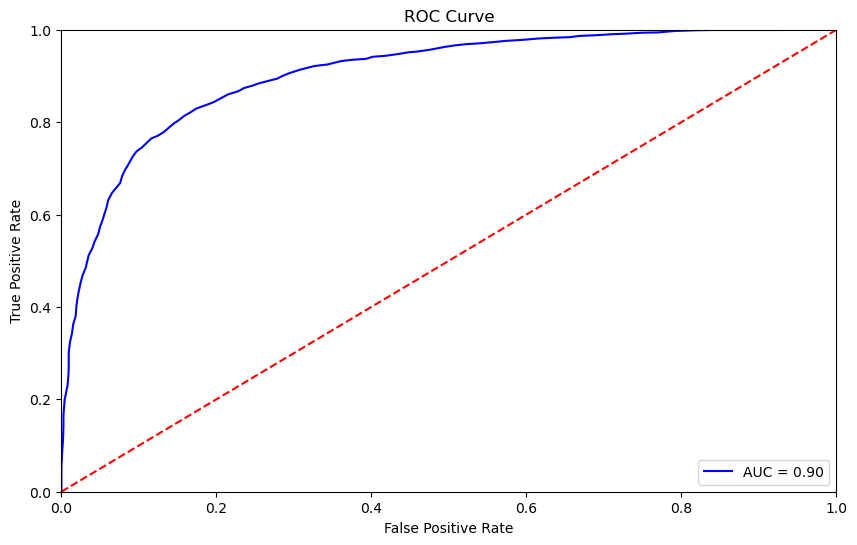

In [23]:
#train our model
rf = RandomForestClassifier(random_state=21)
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

# get evaluation report
print("Random Forest Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print('--------------------------------------------------------------------')
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ADABOOST

AdaBoost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      7499
           1       0.83      0.84      0.84      7541

    accuracy                           0.84     15040
   macro avg       0.84      0.84      0.84     15040
weighted avg       0.84      0.84      0.84     15040


Confusion Matrix - In Sample
[[6248 1251]
 [1217 6324]]

--------------------------------------------------------------------

Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1901
           1       0.82      0.84      0.83      1859

    accuracy                           0.83      3760
   macro avg       0.83      0.83      0.83      3760
weighted avg       0.83      0.83      0.83      3760


Confusion Matrix - Out Sample
[[1563  338]
 [ 294 1565]]


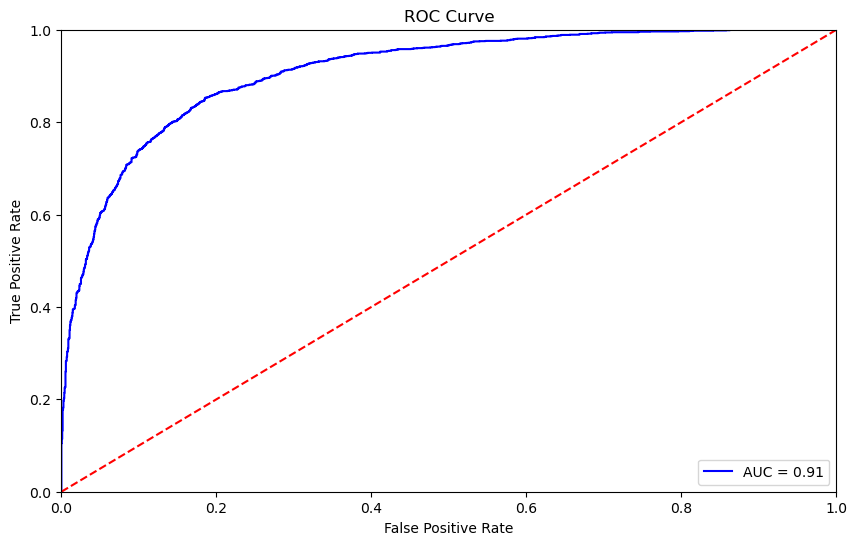

In [24]:
#train our model
ada = AdaBoostClassifier(random_state=21)
ada.fit(X_train, y_train)

#get predictions
in_sample_preds = ada.predict(X_train)
out_sample_preds = ada.predict(X_test)

# get evaluation report
print("AdaBoost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print('--------------------------------------------------------------------')
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = ada.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# GRADIENT BOOST

Gradient Boosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7499
           1       0.85      0.84      0.85      7541

    accuracy                           0.85     15040
   macro avg       0.85      0.85      0.85     15040
weighted avg       0.85      0.85      0.85     15040


Confusion Matrix - In Sample
[[6394 1105]
 [1172 6369]]

--------------------------------------------------------------------

Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1901
           1       0.82      0.85      0.84      1859

    accuracy                           0.83      3760
   macro avg       0.83      0.83      0.83      3760
weighted avg       0.83      0.83      0.83      3760


Confusion Matrix - Out Sample
[[1561  340]
 [ 282 1577]]


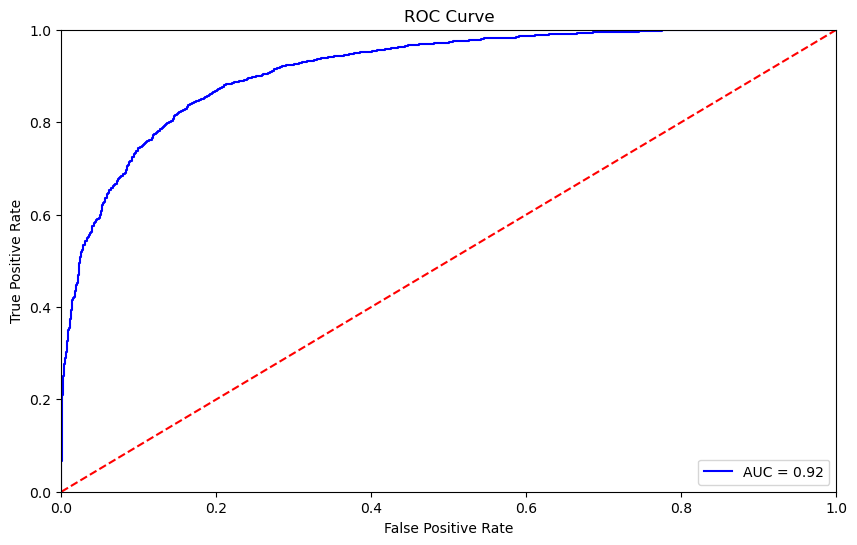

In [25]:
#train our model
gb = GradientBoostingClassifier(random_state=21)
gb.fit(X_train, y_train)

#get predictions
in_sample_preds = gb.predict(X_train)
out_sample_preds = gb.predict(X_test)

# get evaluation report
print("Gradient Boosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print('--------------------------------------------------------------------')
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = gb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBOOST MODEL

XTreme Gradient Boosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7499
           1       0.96      0.95      0.95      7541

    accuracy                           0.95     15040
   macro avg       0.95      0.95      0.95     15040
weighted avg       0.95      0.95      0.95     15040


Confusion Matrix - In Sample
[[7178  321]
 [ 414 7127]]

--------------------------------------------------------------------

Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1901
           1       0.82      0.83      0.83      1859

    accuracy                           0.83      3760
   macro avg       0.83      0.83      0.83      3760
weighted avg       0.83      0.83      0.83      3760


Confusion Matrix - Out Sample
[[1574  327]
 [ 321 1538]]


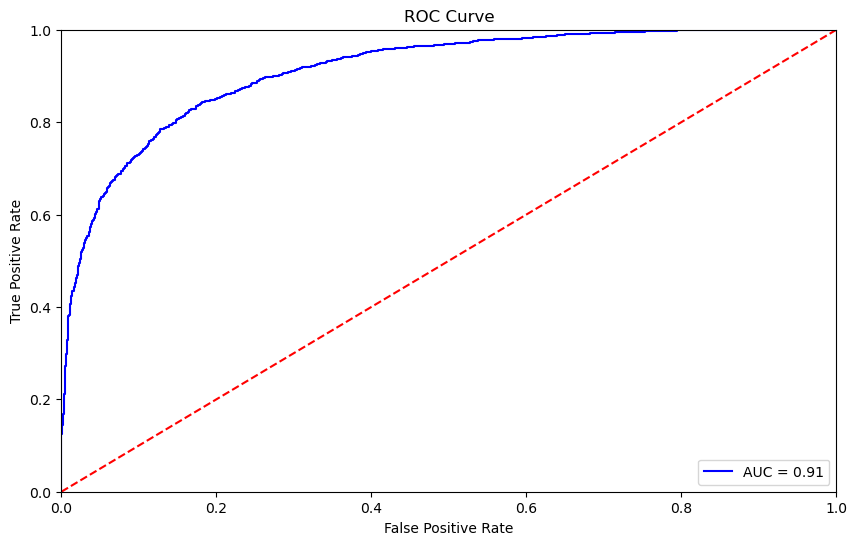

In [26]:
#train our model
xgb = XGBClassifier(random_state=21)
xgb.fit(X_train, y_train)

#get predictions
in_sample_preds = xgb.predict(X_train)
out_sample_preds = xgb.predict(X_test)

# get evaluation report
print("XTreme Gradient Boosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print('--------------------------------------------------------------------')
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# MODEL SELECTION

## I choose to go with XGBoost

XTreme Gradient Boosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9400
           1       0.94      0.94      0.94      9400

    accuracy                           0.94     18800
   macro avg       0.94      0.94      0.94     18800
weighted avg       0.94      0.94      0.94     18800


Confusion Matrix - In Sample
[[8843  557]
 [ 567 8833]]


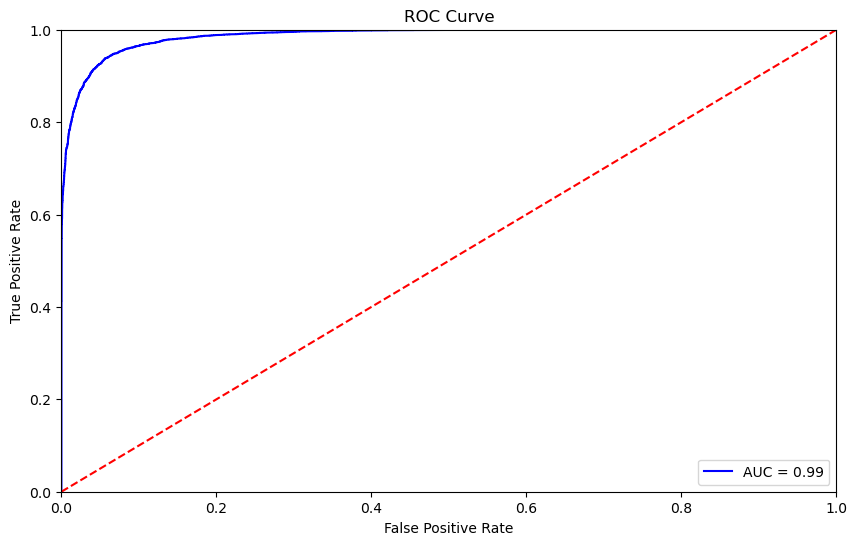

In [27]:
#train our model
xgb = XGBClassifier(random_state=21)
xgb.fit(X, y)

#get predictions
in_sample_preds = xgb.predict(X)

# get evaluation report
print("XTreme Gradient Boosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y, in_sample_preds))

# get probabilities for the ROC curve
preds = xgb.predict_proba(X)[:,1]
fpr, tpr, threshold = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Save Model for Real World Applications

In [28]:
import pickle
filename = 'ncaa_xgb.sav'
pickle.dump(xgb, open(filename, 'wb'))

# Load the Model Back in to Use for Predictions

In [29]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

probs = loaded_model.predict_proba(X)
probs = probs[:,1]
loss = brier_score_loss(y, probs)

print(probs)
print(loss)

[0.7389503  0.8204691  0.97750455 ... 0.05875695 0.4343159  0.01308772]
0.05074070542500432


# Create Matchup for Test

In [30]:
outcome = []

def get_matchup(team_a_input, team_b_input, season_input):
    team_a = team_a_input
    team_b = team_b_input
    season = season_input

    team_a_stats = df.loc[(df.TeamID == team_a) & (df.Season == season)]
    team_a_results = team_a_stats['Result']
    team_a_stats = team_a_stats.drop(['Result'], axis=1)

    team_b_stats = df.loc[(df.TeamID == team_b) & (df.Season == season)]
    team_b_results = team_b_stats['Result']
    team_b_stats = team_b_stats.drop(['Result'], axis=1)

    probs_team_a = loaded_model.predict_proba(team_a_stats)
    probs_team_a = probs_team_a[:,1]
    loss_team_a = brier_score_loss(team_a_results, probs_team_a)

    probs_team_b = loaded_model.predict_proba(team_b_stats)
    probs_team_b = probs_team_b[:,1]
    loss_team_b = brier_score_loss(team_b_results, probs_team_b)
    
    team_a_win_prob = probs_team_a.mean()/(probs_team_a.mean()+probs_team_b.mean())
    team_b_win_prob = probs_team_b.mean()/(probs_team_a.mean()+probs_team_b.mean())

    outcome.append(team_a_win_prob)

In [31]:
# Read in sample submission set
SampleSubmission_df = pd.read_csv("SampleSubmission2023.csv")
SampleSubmission_df

,ID,Pred
0,2023_1101_1102,0.5
1,2023_1101_1103,0.5
2,2023_1101_1104,0.5
3,2023_1101_1105,0.5
4,2023_1101_1106,0.5
...,...,...
130678,2023_3474_3476,0.5
130679,2023_3474_3477,0.5
130680,2023_3475_3476,0.5
130681,2023_3475_3477,0.5


In [32]:
# Expand the ID column into Season and Team columns
SampleSubmission_df[['Season', 'ATeam', 'BTeam']] = SampleSubmission_df['ID'].str.split('_', expand=True).astype(int)
SampleSubmission_df.head()

,ID,Pred,Season,ATeam,BTeam
0,2023_1101_1102,0.5,2023,1101,1102
1,2023_1101_1103,0.5,2023,1101,1103
2,2023_1101_1104,0.5,2023,1101,1104
3,2023_1101_1105,0.5,2023,1101,1105
4,2023_1101_1106,0.5,2023,1101,1106


In [33]:
#Run Matchup for All Teams
Season = []
ATeam = []
BTeam = []

for index, row in SampleSubmission_df.iterrows():
    Season = SampleSubmission_df.Season
    ATeam = SampleSubmission_df.ATeam
    BTeam = SampleSubmission_df.BTeam
    get_matchup(row['ATeam'],row['BTeam'],row['Season'])

In [34]:
len(outcome)

130683

In [35]:
SampleSubmission_df['Pred'] = outcome

In [36]:
SampleSubmission_df = SampleSubmission_df.drop(['Season','ATeam','BTeam'], axis=1)

In [37]:
SampleSubmission_df

,ID,Pred
0,2023_1101_1102,0.441209
1,2023_1101_1103,0.383291
2,2023_1101_1104,0.320425
3,2023_1101_1105,0.506191
4,2023_1101_1106,0.587140
...,...,...
130678,2023_3474_3476,0.396401
130679,2023_3474_3477,0.283116
130680,2023_3475_3476,0.560413
130681,2023_3475_3477,0.433954


In [38]:
SampleSubmission_df.to_csv('XGBModelSubmission.csv')

# RANDOM STUFF DONE WELL AFTER ON 5-10-2023

In [80]:
df.head()

,Season,TeamID,Score,OR,DR,Ast,TO,Stl,Blk,PF,Result,FG_Percent,FG3_Percent,FT_Percent
102032,2023,1101,0.411765,0.121212,0.574468,0.352941,0.333333,0.36,0.3125,0.394737,1,0.403509,0.285714,0.550000
102033,2023,1103,0.568627,0.242424,0.468085,0.470588,0.179487,0.20,0.3125,0.394737,1,0.434783,0.354839,0.833333
102034,2023,1104,0.509804,0.575758,0.893617,0.294118,0.435897,0.24,0.5625,0.421053,1,0.391304,0.107143,0.692308
102035,2023,1112,0.921569,0.212121,0.744681,0.882353,0.564103,0.28,0.3125,0.526316,1,0.716981,0.611111,0.750000
102036,2023,1113,0.382353,0.424242,0.638298,0.294118,0.487179,0.32,0.6875,0.657895,1,0.338710,0.250000,0.482759


In [81]:
df1 = df.groupby(by=df.Result).mean()
df1

,Season,TeamID,Score,OR,DR,Ast,TO,Stl,Blk,PF,FG_Percent,FG3_Percent,FT_Percent
Result,,,,,,,,,,,,,
0,2023.0,2267.248511,0.373972,0.259036,0.424276,0.324102,0.319760,0.257430,0.169249,0.420627,0.386073,0.288089,0.693497
1,2023.0,2269.549574,0.505093,0.278988,0.510023,0.433364,0.278393,0.304072,0.220871,0.371198,0.462238,0.359757,0.725003


<Axes: xlabel='Result'>

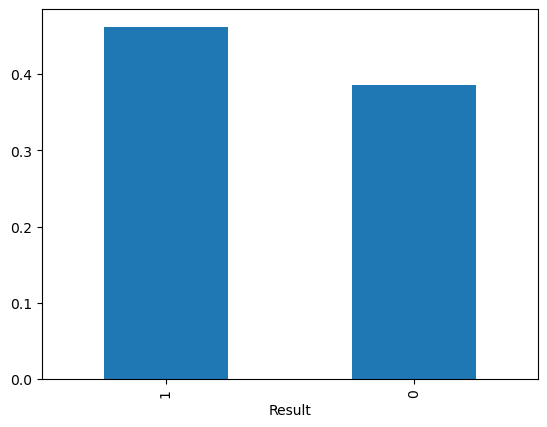

In [82]:
df.groupby("Result").FG_Percent.mean().sort_values(ascending=False).plot(kind="bar")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


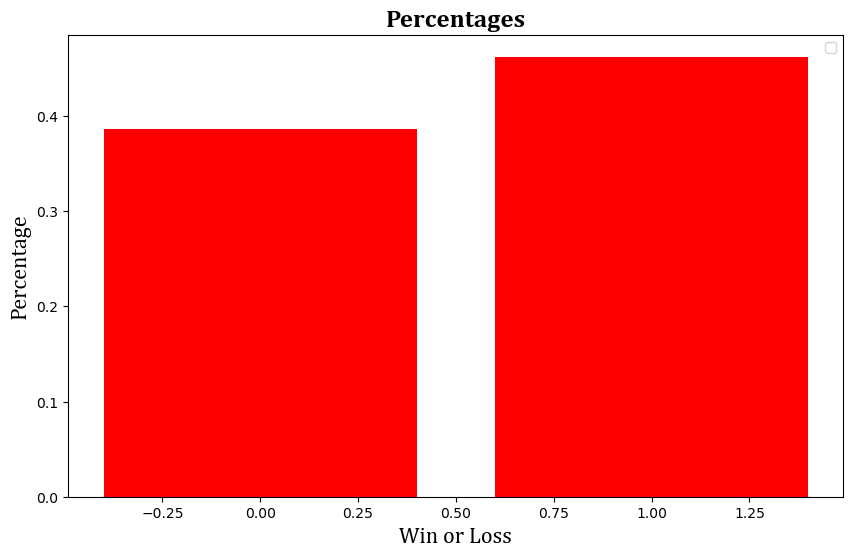

In [83]:
plt.figure(figsize=(10,6))

x = df.groupby("Result").Result.mean()
y = df.groupby("Result").FG_Percent.mean()
# y1 = df
# y2 = df

plt.bar(x, y, color ='r')
# plt.bar(x, y1, color ='g')
# plt.bar(x, y2, color = 'b')

plt.title("Percentages", fontsize=18, fontweight="bold", fontname="Cambria")
plt.xlabel('Win or Loss', fontsize=16, fontname="Cambria")
plt.ylabel("Percentage", fontsize=16, fontname="Cambria")

plt.legend()
plt.show()

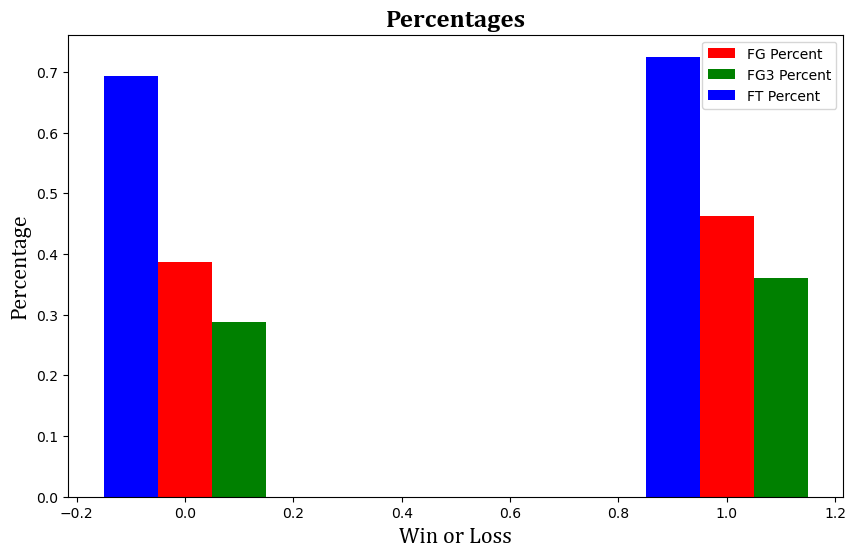

In [84]:
plt.figure(figsize=(10,6))

x = df.groupby("Result").Result.mean()
y = df.groupby("Result").FG_Percent.mean()
y1 = df.groupby("Result").FG3_Percent.mean()
y2 = df.groupby("Result").FT_Percent.mean()

width = 0.1

plt.bar(x, y, color ='r', width=width, label='FG Percent')
plt.bar(x+width, y1, color ='g', width=width, label='FG3 Percent')
plt.bar(x-width, y2, color = 'b', width=width, label='FT Percent')

plt.title("Percentages", fontsize=18, fontweight="bold", fontname="Cambria")
plt.xlabel('Win or Loss', fontsize=16, fontname="Cambria")
plt.ylabel("Percentage", fontsize=16, fontname="Cambria")

plt.legend()
plt.show()